# Solar Activity and Global Warming

### Notebook by Jennifer Li

## Outline:
- Time series analysis on sunspot data and earth temperature data (Periodogram, ACF, etc...)
- Correlation between solar activity and global warming

## 1. Import, clean and visualize the data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
silso1818 = pd.read_csv('./sunspot_data/SILSO_daily_1818.csv', delimiter=';')
silso1818.columns = ['Year', 'Month', 'Day', 'Decimal year', 'SSN', 'Stdev', 'No. of observations', 'Definitive/provisional']


In [4]:
ind = np.where(silso1818['SSN']!=-1)[0]
tsunspot = np.array(silso1818['Decimal year'][ind])
nsunspot = np.array(silso1818['SSN'][ind])
esunspot = np.array(silso1818['Stdev'][ind])

Text(0.5, 0, 'Date [Year]')

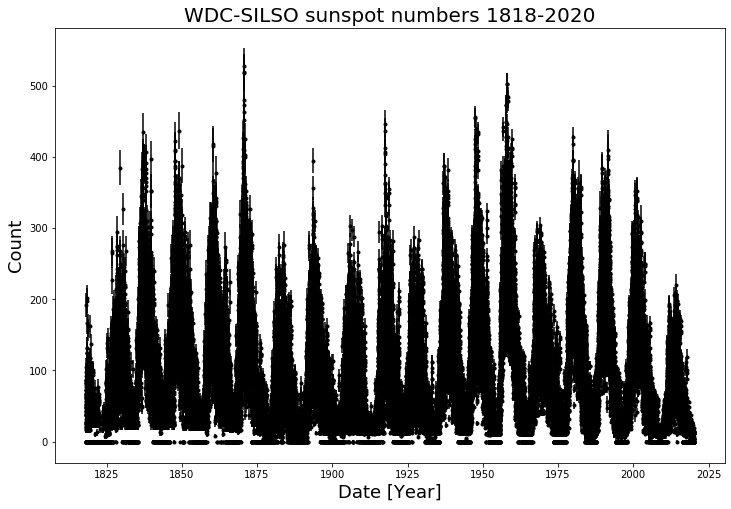

In [5]:
plt.figure(figsize=(12,8))
plt.title('WDC-SILSO sunspot numbers 1818-2020',fontsize=20)
plt.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.')
plt.ylabel('Count',fontsize=18)
plt.xlabel('Date [Year]',fontsize=18)

In [6]:
## get earth temperature data from http://berkeleyearth.org/data/
land_sea = pd.read_csv('temp_data/Land_and_Ocean_complete.txt',comment='%',sep='\s+',header=0,names=['year','month','anomaly_month','unc_month','anomaly_annual','unc_annual','anomaly_5yr','unc_5yr','anomaly_10yr','unc_10yr','anomaly_20yr','unc_20yr'])
ttemp = land_sea['year']+land_sea['month']/12.
temp = land_sea['anomaly_month']
etemp = land_sea['unc_month']

Text(0.5, 0, 'Date [Year]')

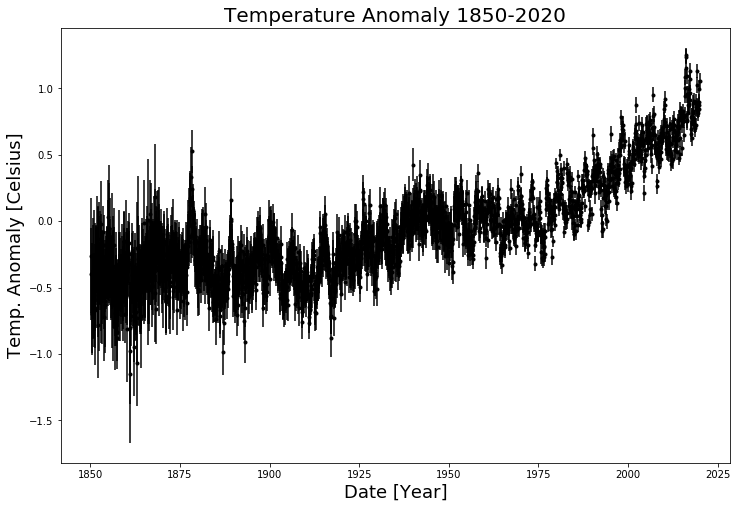

In [7]:
plt.figure(figsize=(12,8))
plt.title('Temperature Anomaly 1850-2020',fontsize=20)
plt.errorbar(ttemp,temp,yerr=etemp,fmt='k.')
plt.ylabel('Temp. Anomaly [Celsius]',fontsize=18)
plt.xlabel('Date [Year]',fontsize=18)

## 2. Time Series Analysis

### First, try to visualize different variability scale by compute the moving average of some reasonable scales, e.g. monthly, yearly, and long term (e.g. 5, 10, 20 years).

In [8]:
def moving_average(time,data,err=None,window=1.):
    tma = np.array([])
    nma = np.array([])
    ema = np.array([])
    for i in range(len(time)):
        ind = np.where(np.all([time>time[i],time<=time[i]+window],axis=0))[0]
        tma = np.append(tma, np.average(time[ind]))
        nma = np.append(nma, np.average(data[ind]))
        #print(time[ind],data[ind])
        #print (np.sqrt(np.sum((err[ind])**2)/float(len(ind))))
        #if err!= None: ema = np.append(ema, np.sqrt(np.sum((err[ind])**2)/float(len(ind))))
    return tma, nma;#, ema;

In [9]:
tsunspot_1yr, nsunspot_1yr = moving_average(tsunspot,nsunspot,err=esunspot,window=1)
tsunspot_5yr, nsunspot_5yr = moving_average(tsunspot,nsunspot,err=esunspot,window=5)
tsunspot_11yr, nsunspot_11yr = moving_average(tsunspot,nsunspot,err=esunspot,window=11)
tsunspot_22yr, nsunspot_22yr = moving_average(tsunspot,nsunspot,err=esunspot,window=22)


/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'WDC-SILSO sunspot numbers 1818-2020')

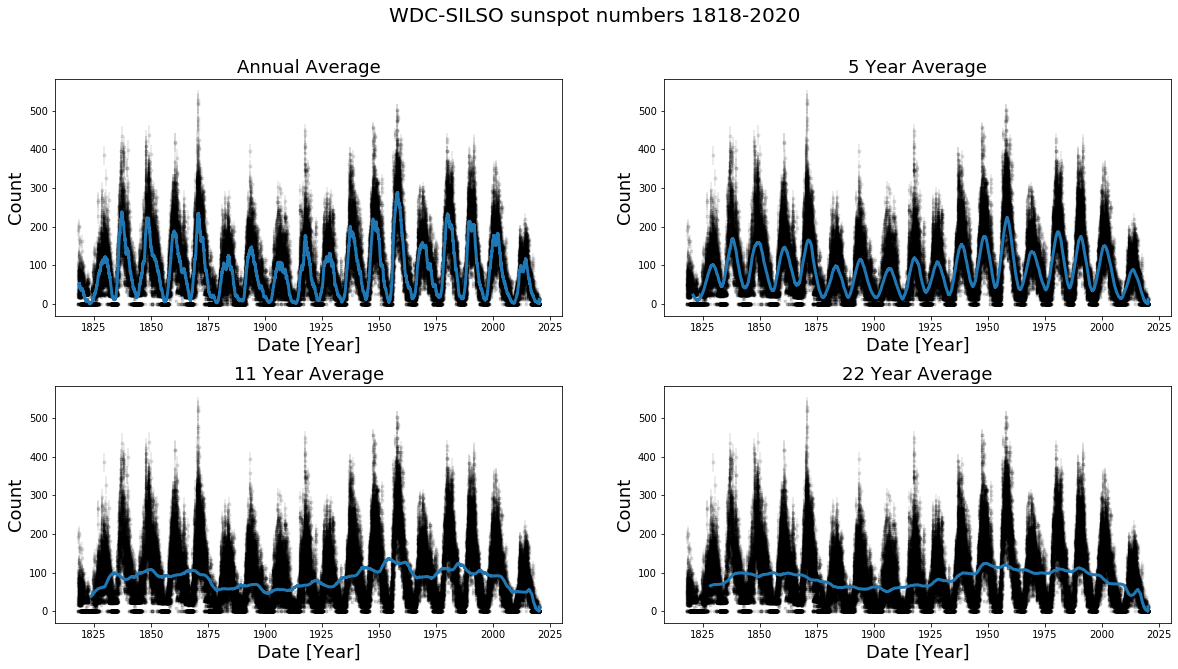

In [10]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_1yr,nsunspot_1yr,'-',label='Annual',lw=3)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax2.plot(tsunspot_5yr,nsunspot_5yr,'-',label='5 year',lw=3)
ax2.set_title('5 Year Average',fontsize=18)
ax2.set_ylabel('Count',fontsize=18)
ax2.set_xlabel('Date [Year]',fontsize=18)

ax3.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax3.plot(tsunspot_11yr,nsunspot_11yr,'-',label='11 Year',lw=3)
ax3.set_title('11 Year Average',fontsize=18)
ax3.set_ylabel('Count',fontsize=18)
ax3.set_xlabel('Date [Year]',fontsize=18)

ax4.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax4.plot(tsunspot_22yr,nsunspot_22yr,'-',label='22 Year',lw=3)
ax4.set_title('22 Year Average',fontsize=18)
ax4.set_ylabel('Count',fontsize=18)
ax4.set_xlabel('Date [Year]',fontsize=18)

plt.suptitle('WDC-SILSO sunspot numbers 1818-2020',fontsize=20)

Text(0.5, 0.98, 'Temperature Anomaly 1850-2020')

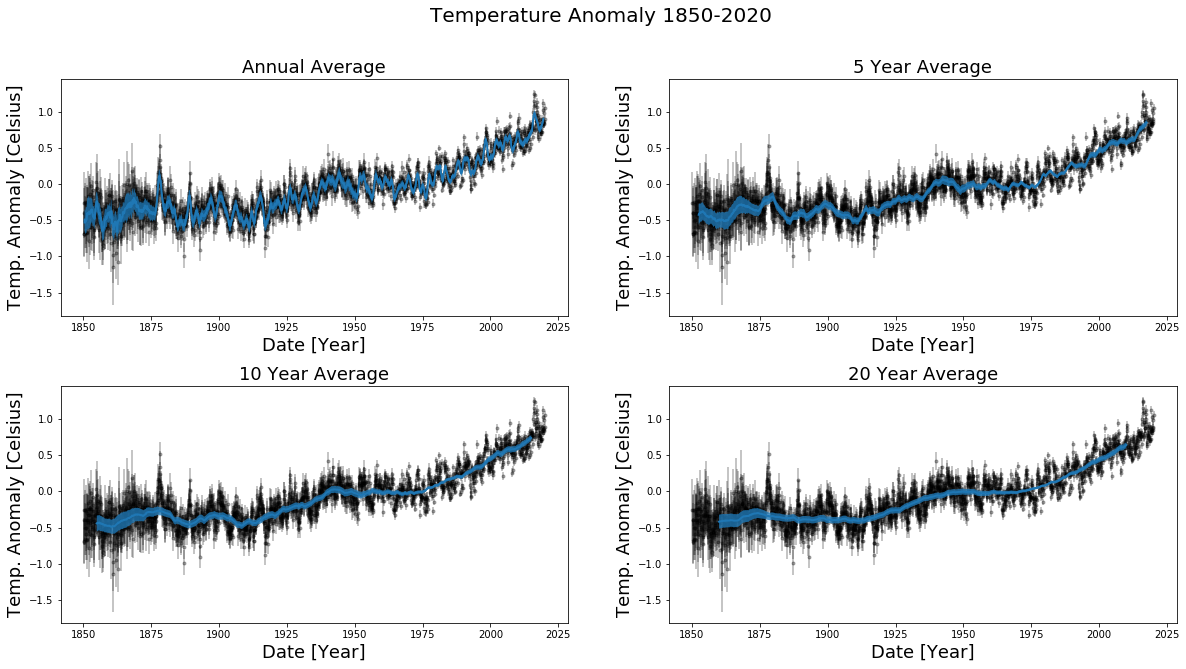

In [11]:
#plt.figure(figsize=(12,8))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.3,zorder=-10)
ax1.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual'],'-',label='Annual',lw=2)
ax1.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual']-land_sea['unc_annual'],y2=land_sea['anomaly_annual']+land_sea['unc_annual'],alpha=0.8)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.3,zorder=-10)
ax2.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_5yr'],'-',label='5yr',lw=2)
ax2.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_5yr']-land_sea['unc_5yr'],y2=land_sea['anomaly_5yr']+land_sea['unc_5yr'],alpha=0.8)
ax2.set_title('5 Year Average',fontsize=18)
ax2.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax2.set_xlabel('Date [Year]',fontsize=18)

ax3.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.3,zorder=-10)
ax3.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_10yr'],'-',label='10yr',lw=2)
ax3.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_10yr']-land_sea['unc_10yr'],y2=land_sea['anomaly_10yr']+land_sea['unc_10yr'],alpha=0.8)
ax3.set_title('10 Year Average',fontsize=18)
ax3.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax3.set_xlabel('Date [Year]',fontsize=18)

ax4.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.3,zorder=-10)
ax4.plot(land_sea['year'][:]+land_sea['month'][:]/12.,land_sea['anomaly_20yr'][:],'-',label='20yr',lw=2)
ax4.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_20yr']-land_sea['unc_20yr'],y2=land_sea['anomaly_20yr']+land_sea['unc_20yr'],alpha=0.8)
ax4.set_title('20 Year Average',fontsize=18)
ax4.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax4.set_xlabel('Date [Year]',fontsize=18)

plt.suptitle('Temperature Anomaly 1850-2020',fontsize=20)

#print (land_sea['anomaly_20yr'][150],land_sea['year'][150]+land_sea['month'][150]/12.)

### Use Lomb-Scargle periodogram to identify periodogic features. The Lomb-Scargle periodogram of SSN shows a peak at ~9 years, which is similar to the known period of ~11 years for sunspot cycles. The periodogram of temperature shows prominent peak at ~1 year and ~75 years.

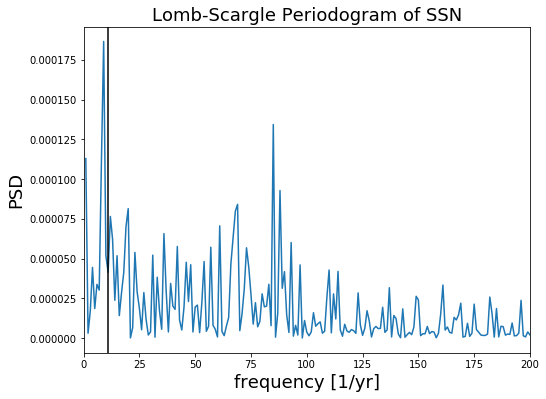

In [12]:
from scipy import signal
fsample = np.linspace(1,200,num=200)
intens = signal.lombscargle(tsunspot, nsunspot, fsample, normalize=True)
plt.figure(figsize=(8,6))
plt.title('Lomb-Scargle Periodogram of SSN',fontsize=18)
plt.plot(fsample,intens)
plt.xlabel('frequency [1/yr]',fontsize=18)
plt.ylabel('PSD',fontsize=18)
plt.xlim([0,200])
plt.axvline(x=11,color='k')
plt.show()

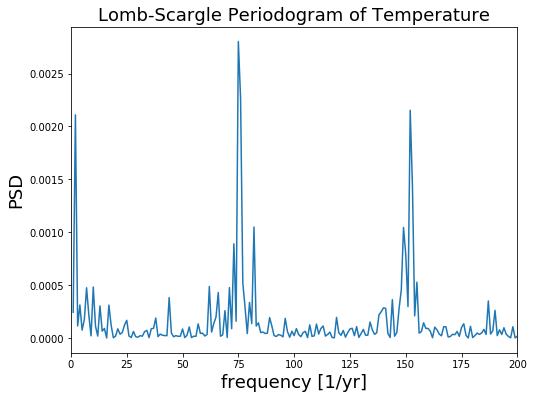

In [13]:
## some periodagram analysis for the surface temp
from scipy import signal
intens = signal.lombscargle(ttemp, temp, fsample, normalize=True)
plt.figure(figsize=(8,6))
plt.title('Lomb-Scargle Periodogram of Temperature',fontsize=18)
plt.plot(fsample,intens)
plt.xlabel('frequency [1/yr]',fontsize=18)
plt.ylabel('PSD',fontsize=18)
plt.xlim([0,200])
plt.show()

### Use ACF to identify varibility signatures. First, use the daily data to identify the short term variability, which turns out to be ~11yr. Next, use the 11yr average data to find to long-term variability, which turns out to be ~124 yrs.

In [14]:
import PYCCF as ccf

sampling_rate = np.min(np.diff(tsunspot))
interp = 1.#*sampling_rate    #interpolation interval (days) 
lag_range = [-100.,100.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

tlag_peak_ssn, status_peak_ssn, tlag_centroid_ssn, status_centroid_ssn, ccf_pack_ssn, max_rval_ssn, status_rval_ssn, peak_pvalue_ssn = ccf.peakcent(tsunspot, nsunspot, tsunspot, nsunspot, lag_range[0], lag_range[1], interp)

/Users/jell0727/Desktop/ast596fds-final/PYCCF.py:48: RuntimeWarning: invalid value encountered in sqrt
  tst = r*np.sqrt(v/(1.-r2))


(-100, 100)

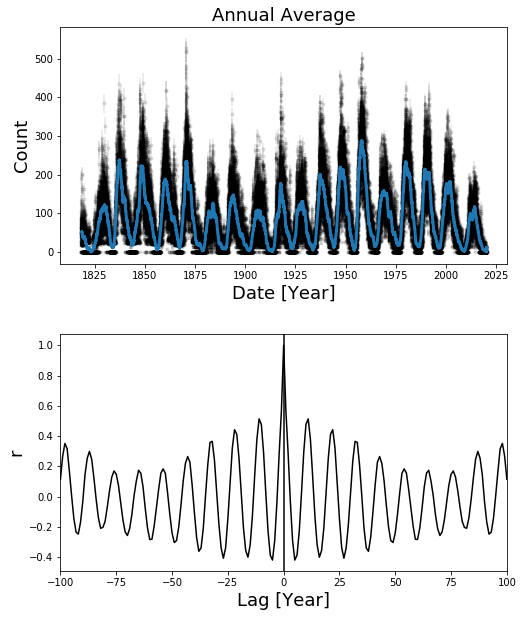

In [15]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_1yr,nsunspot_1yr,'-',label='Annual',lw=3)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.plot(ccf_pack_ssn[1],ccf_pack_ssn[0],'k-')
ax2.axvline(x=tlag_centroid_ssn,color='k')
ax2.set_ylabel('r',fontsize=18)
ax2.set_xlabel('Lag [Year]',fontsize=18)

plt.xlim([-100,100])

In [16]:
time_bracket= [5,15,25,40,50,65,70,85]
for i in range(len(time_bracket)-1):
    ind = np.where(np.all([ccf_pack_ssn[1]>time_bracket[i],ccf_pack_ssn[1]<=time_bracket[i+1]],axis=0))[0]
    #print (ccf_pack_ssn[0][ind])
    #print (ccf_pack_ssn[1][ind])
    #print (np.argmax(ccf_pack_ssn[0][ind]))
    print (ccf_pack_ssn[1][ind[np.argmax(ccf_pack_ssn[0][ind])]])

11.0
22.0
32.0
43.0
54.0
66.0
76.0


In [17]:
sampling_rate = np.min(np.diff(tsunspot))
interp = 1.#*sampling_rate    #interpolation interval (days) 
lag_range = [-200.,200.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2         #If set, will exclude points with r_max below 0.2.

ind_nonan = np.where(np.isfinite(tsunspot_11yr))[0]
tlag_peak_ssn11, status_peak_ssn11, tlag_centroid_ssn11, status_centroid_ssn11, ccf_pack_ssn11, max_rval_ssn11, status_rval_ssn11, peak_pvalue_ssn11 = ccf.peakcent(tsunspot_11yr[ind_nonan], nsunspot_11yr[ind_nonan], tsunspot_11yr[ind_nonan], nsunspot_11yr[ind_nonan], lag_range[0], lag_range[1], interp)


(-200, 200)

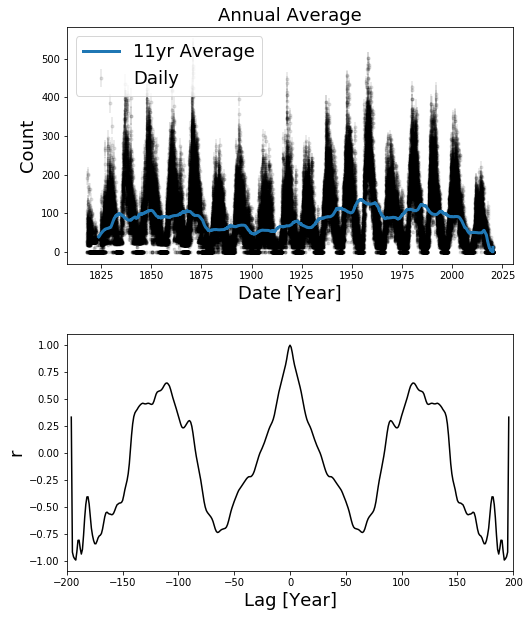

In [18]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Daily',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_11yr,nsunspot_11yr,'-',label='11yr Average',lw=3)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)
ax1.legend(fontsize=18)

ax2.plot(ccf_pack_ssn11[1],ccf_pack_ssn11[0],'k-')
#ax2.axvline(x=tlag_centroid_ssn,color='k')
ax2.set_ylabel('r',fontsize=18)
ax2.set_xlabel('Lag [Year]',fontsize=18)


plt.xlim([-200,200])

In [20]:
time_bracket= [75,150]
for i in range(len(time_bracket)-1):
    ind = np.where(np.all([ccf_pack_ssn11[1]>time_bracket[i],ccf_pack_ssn11[1]<=time_bracket[i+1]],axis=0))[0]
    #print (ccf_pack_ssn[0][ind])
    #print (ccf_pack_ssn[1][ind])
    #print (np.argmax(ccf_pack_ssn[0][ind]))
    print ('peak is at',ccf_pack_ssn11[1][ind[np.argmax(ccf_pack_ssn11[0][ind])]])

peak is at 111.0


## Now do the same thing for the temperature data

In [21]:
sampling_rate = np.min(np.diff(tsunspot))
interp = 1.#*sampling_rate    #interpolation interval (days) 
lag_range = [-100.,100.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

tlag_peak, status_peak, tlag_centroid, status_centroid, ccf_pack, max_rval, status_rval, peak_pvalue = ccf.peakcent(ttemp, temp, ttemp, temp, lag_range[0], lag_range[1], interp)


(-100, 100)

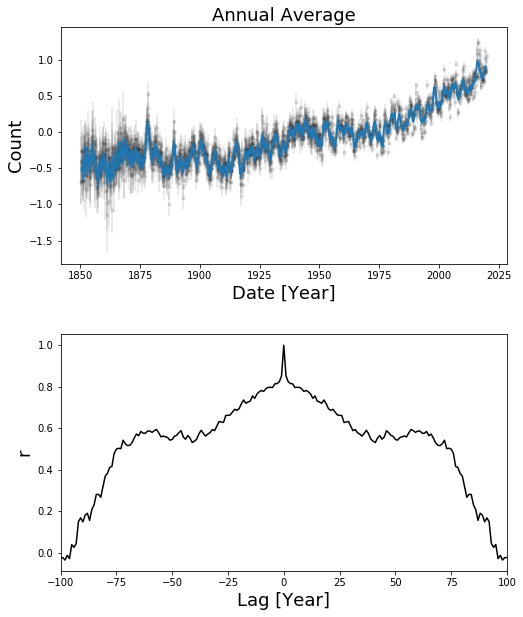

In [22]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual'],'-',label='Annual',lw=2)
ax1.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual']-land_sea['unc_annual'],y2=land_sea['anomaly_annual']+land_sea['unc_annual'],alpha=0.8)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.plot(ccf_pack[1],ccf_pack[0],'k-')
#ax2.axvline(x=11,color='k')
ax2.set_ylabel('r',fontsize=18)
ax2.set_xlabel('Lag [Year]',fontsize=18)

plt.xlim([-100,100])

In [23]:
ttemp_1yr = land_sea['year']+land_sea['month']/12.
temp_1yr = land_sea['anomaly_annual']

interp = 0.5#*sampling_rate    #interpolation interval (days) 
lag_range = [-100.,100.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

ind_nonan = np.where(np.isfinite(temp_1yr))[0]
tlag_peak_tt, status_peak_tt, tlag_centroid_tt, status_centroid_tt, ccf_pack_tt, max_rval_tt, status_rval_tt, peak_pvalue_tt = ccf.peakcent(ttemp_1yr[ind_nonan], temp_1yr[ind_nonan], ttemp_1yr[ind_nonan], temp_1yr[ind_nonan], lag_range[0], lag_range[1], interp)



(-100, 100)

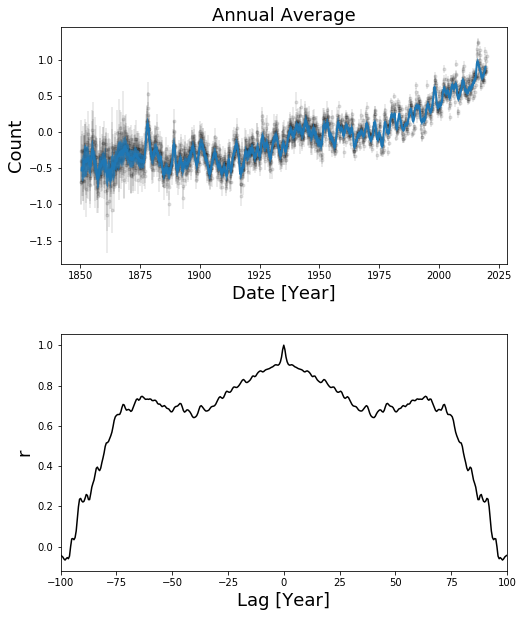

In [24]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual'],'-',label='Annual',lw=2)
ax1.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual']-land_sea['unc_annual'],y2=land_sea['anomaly_annual']+land_sea['unc_annual'],alpha=0.8)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.plot(ccf_pack_tt[1],ccf_pack_tt[0],'k-')
#ax2.axvline(x=11,color='k')
ax2.set_ylabel('r',fontsize=18)
ax2.set_xlabel('Lag [Year]',fontsize=18)

plt.xlim([-100,100])

## Compute CCF to see if there's any cross correlation. Try for both short term and long term time scale, but didn't find anything significant.

In [25]:

sampling_rate = np.min(np.diff(tsunspot))
interp = 0.1#*sampling_rate    #interpolation interval (days) 
lag_range = [-22.,22.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

tlag_peak, status_peak, tlag_centroid, status_centroid, ccf_pack, max_rval, status_rval, peak_pvalue = ccf.peakcent(tsunspot, nsunspot, ttemp, temp, lag_range[0], lag_range[1], interp)


(-22.0, 22.0)

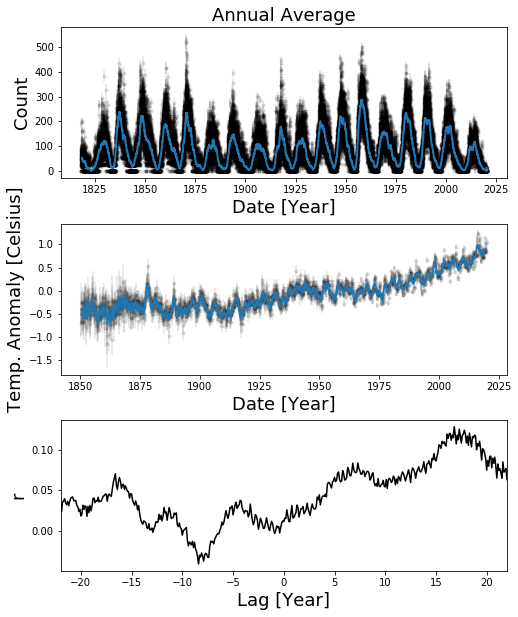

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_1yr,nsunspot_1yr,'-',label='Annual',lw=2)
ax1.set_title('Annual Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax2.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual'],'-',label='Annual',lw=2)
ax2.fill_between(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual']-land_sea['unc_annual'],y2=land_sea['anomaly_annual']+land_sea['unc_annual'],alpha=0.8)
ax2.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax2.set_xlabel('Date [Year]',fontsize=18)

ax3.plot(ccf_pack[1],ccf_pack[0],'k-')
ax3.axvline(x=tlag_centroid,color='k')
ax3.set_ylabel('r',fontsize=18)
ax3.set_xlabel('Lag [Year]',fontsize=18)
ax3.set_xlim(lag_range)

In [27]:
ttemp_11yr, temp_11yr = moving_average(ttemp,temp,err=etemp,window=11)

sampling_rate = np.min(np.diff(tsunspot))
interp = 0.1#*sampling_rate    #interpolation interval (days) 
lag_range = [-22,22]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

ind_nonan_s = np.where(np.isfinite(tsunspot_1yr))[0]
ind_nonan_t = np.where(np.isfinite(temp_1yr))[0]

tlag_peak, status_peak, tlag_centroid, status_centroid, ccf_pack, max_rval, status_rval, peak_pvalue = ccf.peakcent(tsunspot_11yr[ind_nonan_s], nsunspot_11yr[ind_nonan_s], ttemp_11yr[ind_nonan_t], temp_11yr[ind_nonan_t], lag_range[0], lag_range[1], interp)


/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(-22, 22)

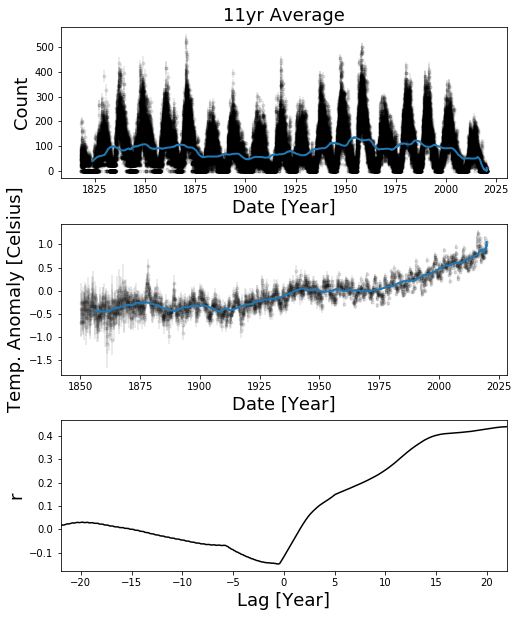

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_11yr,nsunspot_11yr,'-',label='11 yr avg.',lw=2)
ax1.set_title('11yr Average',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)

ax2.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax2.plot(ttemp_11yr,temp_11yr,'-',label='11 yr avg.',lw=2)
ax2.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax2.set_xlabel('Date [Year]',fontsize=18)

ax3.plot(ccf_pack[1],ccf_pack[0],'k-')
ax3.axvline(x=tlag_centroid,color='k')
ax3.set_ylabel('r',fontsize=18)
ax3.set_xlabel('Lag [Year]',fontsize=18)
ax3.set_xlim(lag_range)

In [30]:
sampling_rate = np.min(np.diff(tsunspot))
interp = 0.1#*sampling_rate    #interpolation interval (days) 
lag_range = [-22.,22.]  #[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100              #5000    #Number of Monte Carlo iterations (
mcmode = 0              #FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2          #If set, will exclude points with r_max below 0.2.

ind_prehuman_s = np.where(tsunspot_11yr<1970)[0]
ind_prehuman_t = np.where(ttemp_11yr<1970)[0]

tlag_peak70, status_peak70, tlag_centroid70, status_centroid70, ccf_pack70, max_rval70, status_rval70, peak_pvalue70 = ccf.peakcent(tsunspot_11yr[ind_prehuman_s], nsunspot_11yr[ind_prehuman_s], ttemp_11yr[ind_prehuman_t], temp_11yr[ind_prehuman_t], lag_range[0], lag_range[1], interp)


/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


(-22.0, 22.0)

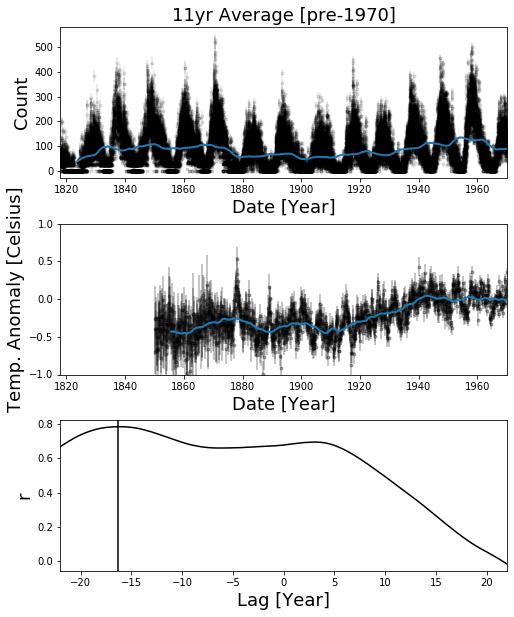

In [31]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(8,10))
plt.subplots_adjust(hspace=0.3)

ax1.errorbar(tsunspot,nsunspot,yerr=esunspot,fmt='k.',label='Monthly',alpha=0.1,zorder=-10)
ax1.plot(tsunspot_11yr,nsunspot_11yr,'-',label='11 yr avg.',lw=2)
ax1.set_title('11yr Average [pre-1970]',fontsize=18)
ax1.set_ylabel('Count',fontsize=18)
ax1.set_xlabel('Date [Year]',fontsize=18)
ax1.set_xlim([1818,1970])

ax2.errorbar(ttemp,temp,yerr=etemp,fmt='k.',label='Monthly',alpha=0.3,zorder=-10)
ax2.plot(ttemp_11yr,temp_11yr,'-',label='11 yr avg.',lw=2)
ax2.set_ylabel('Temp. Anomaly [Celsius]',fontsize=18)
ax2.set_xlabel('Date [Year]',fontsize=18)
ax2.set_xlim([1818,1970])
ax2.set_ylim([-1,1])

ax3.plot(ccf_pack70[1],ccf_pack70[0],'k-')
ax3.axvline(x=tlag_centroid70,color='k')
ax3.set_ylabel('r',fontsize=18)
ax3.set_xlabel('Lag [Year]',fontsize=18)
ax3.set_xlim(lag_range)

### Use Gaussian Process to model the temperature data. 

Text(0, 0.5, 'Land+Sea Temperature')

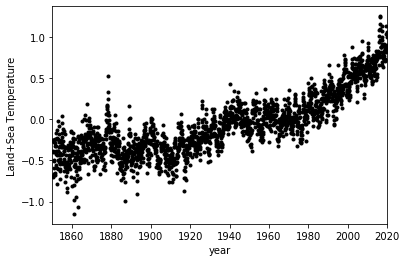

In [32]:
import george
from george import kernels

date_temp = land_sea['year']+land_sea['month']/12.
temp = land_sea['anomaly_month']


plt.plot(date_temp, temp, ".k")
plt.xlim(date_temp.min(), date_temp.max())
plt.xlabel("year")
plt.ylabel("Land+Sea Temperature")

In [91]:
guess = [2.4,90,1.,0., 66, 66]
k1 = guess[0] * kernels.ExpSquaredKernel(metric=guess[1]) * kernels.ExpSine2Kernel(gamma=guess[2], log_period=guess[3])
k2 = guess[4] * kernels.ExpSquaredKernel(metric=guess[5])
kernel = k1 + k2

In [92]:
gp = george.GP(kernel, mean=np.mean(temp), fit_mean=True,
               white_noise=np.log(0.19**2), fit_white_noise=True)
gp.compute(date_temp[::10])
print(gp.log_likelihood(temp[::10]))
print(gp.grad_log_likelihood(temp[::10]))

-126.25795456469137
[ 7.23686940e-03 -1.79766054e+01 -3.65547540e+01  3.08074932e+01
 -4.24940144e+01 -7.72047838e+01 -1.54834886e+01  4.06964449e+01]


In [93]:
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(temp[::10], quiet=True)
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(temp[::10], quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(date_temp[::10])

# Print the initial ln-likelihood.
print(gp.log_likelihood(temp[::10]))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(temp[::10]))

-126.25795456469137
-7.767134916133131


[-0.06008397 -3.72454372  0.05846493  5.23246852  0.06231528 -0.57010201
  3.75568483  5.34740583]
4078 4078 4078


(-2, 2)

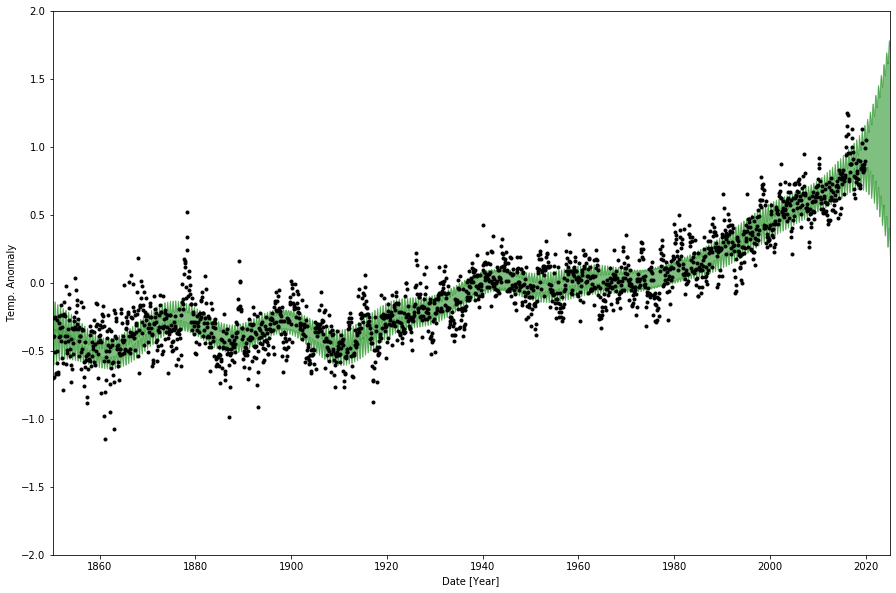

In [95]:
print (results.x)
x = np.linspace(min(date_temp), 2050, 2*len(date_temp))
mu, var = gp.predict(temp[::10], x, return_var=True)
std = np.sqrt(var)
plt.figure(figsize=(15,10))
plt.plot(date_temp, temp, ".k")
print (len(x),len(mu),len(std))
plt.fill_between(x, mu+std, mu-std, color="g", alpha=0.5)

plt.xlim(date_temp.min(), 2025)
plt.xlabel('Date [Year]')
plt.ylabel("Temp. Anomaly")
plt.ylim([-2,2])

In [96]:
for para in gp.get_parameter_dict():
    print(para,':\t',gp.get_parameter_dict()[para])

mean:value :	 -0.06008397294395944
white_noise:value :	 -3.7245437176229723
kernel:k1:k1:k1:log_constant :	 0.05846492684892113
kernel:k1:k1:k2:metric:log_M_0_0 :	 5.232468520216448
kernel:k1:k2:gamma :	 0.062315277521133305
kernel:k1:k2:log_period :	 -0.5701020089564813
kernel:k2:k1:log_constant :	 3.755684829140385
kernel:k2:k2:metric:log_M_0_0 :	 5.347405825683363


In [115]:
priors_lim = []

# limit for mean
priors_lim.append([-10,10])
priors_lim.append([-100,100])
priors_lim.append([-10,10])
priors_lim.append([0.01, 100])
priors_lim.append([-10,10])
priors_lim.append([-10, 10])
priors_lim.append([-10,10])

def lnprob(p0):
    # Trivial uniform prior.
    for j in range(7):
        limit = priors_lim[j]
        if (p0[j] < limit[0]) or (p0[j] > limit[1]):
            return -np.inf

    # Update the kernel and compute the lnlikelihood.
    gp.set_parameter_vector(p0)
    return gp.lnlikelihood(temp[::10], quiet=True)

In [116]:
import emcee
gp.compute(date_temp[::10])

# Set up the sampler.
nwalkers, ndim = 36, len(gp)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Initialize the walkers.
p0 = gp.get_parameter_vector() + 1e-4 * np.random.randn(nwalkers, ndim)

print("Running burn-in")
p0, _, _ = sampler.run_mcmc(p0, 200)

print("Running production chain")
sampler.run_mcmc(p0, 500);

Running burn-in
Running production chain


/Users/jell0727/anaconda/envs/fds/lib/python3.7/site-packages/george/utils.py:30: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(mean, matrix, N)


Text(0, 0.5, 'Temp. Anomaly')

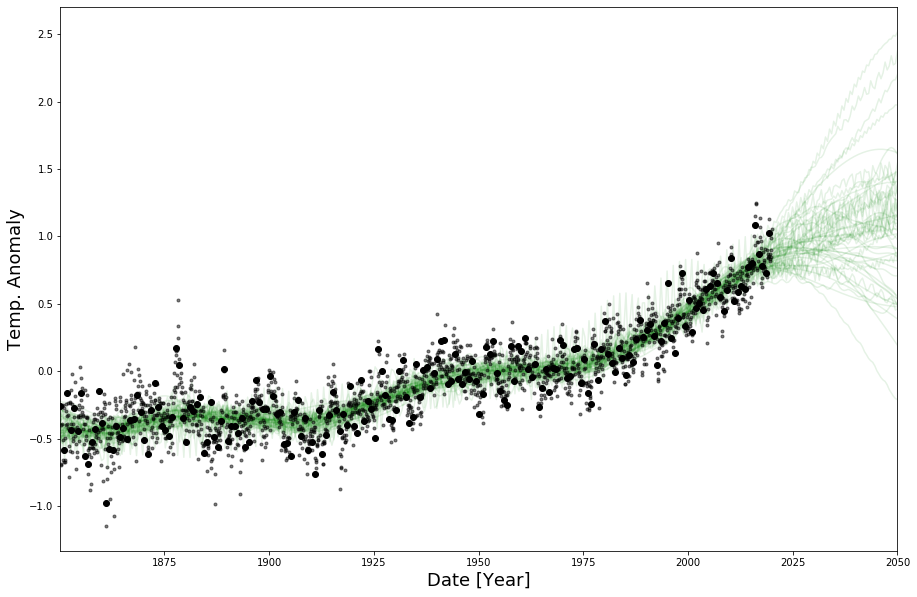

In [117]:
x = np.linspace(min(date_temp[::10]), 2050, 2*len(date_temp[::10]))
plt.figure(figsize=(15,10))
for i in range(50):
    # Choose a random walker and step.
    w = np.random.randint(sampler.chain.shape[0])
    n = np.random.randint(sampler.chain.shape[1])
    gp.set_parameter_vector(sampler.chain[w, n])

    # Plot a single sample.
    plt.plot(x, gp.sample_conditional(temp[::10], x), "g", alpha=0.1)

plt.plot(date_temp, temp, ".k",alpha=0.5)
plt.plot(date_temp[::10], temp[::10], "ok")

plt.xlim(date_temp.min(), 2050)
plt.xlabel('Date [Year]',fontsize=18)
plt.ylabel("Temp. Anomaly",fontsize=18)

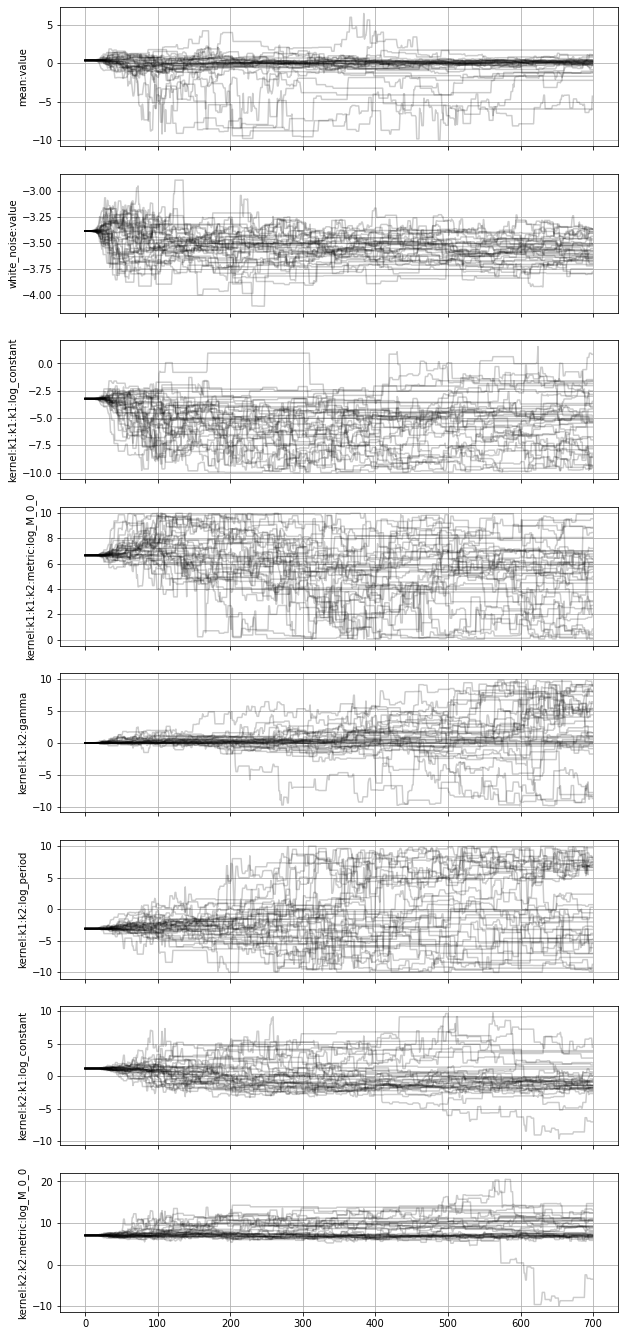

In [118]:
def plot_chains(sampler, nburn, names):
    rows = sampler.chain.shape[2]
    
    fig, ax = plt.subplots(rows, figsize=(10, 3*rows), sharex=True)
    for i in range(rows):
        ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
        ax[i].set_ylabel(names[i])
        ax[i].grid()
        
names = gp.get_parameter_names()
plot_chains(sampler, 100, names)

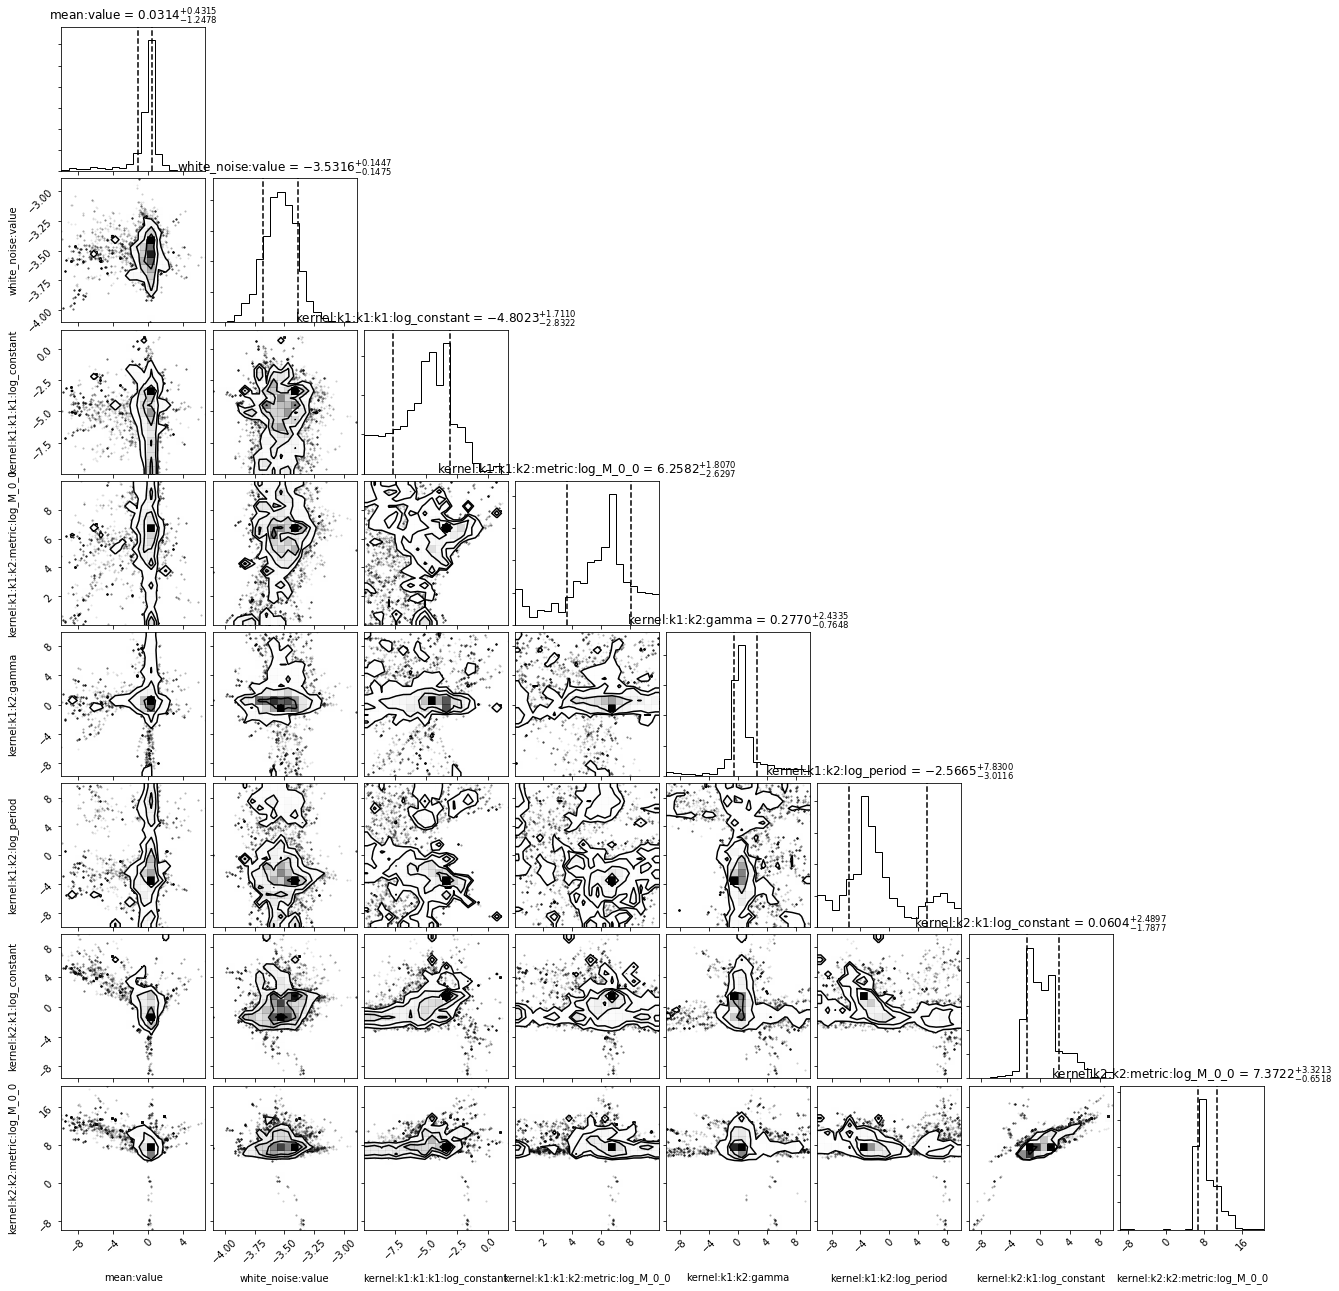

In [119]:

import corner

samples = sampler.get_chain(discard=0, flat=True,)
corner.corner(samples, labels=names, \
              quantiles=(0.16, 0.84), title_fmt='.4f', \
              show_titles=True,);

In [120]:

p_bestfit = np.median(sampler.chain[-100:,], axis=(0,1))

print('Bestfit parameters:\n', p_bestfit)

Bestfit parameters:
 [ 0.03135213 -3.53162688 -4.80225748  6.2581537   0.27700233 -2.56647714
  0.06037762  7.3721731 ]
